In [1]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

In [2]:
uv = UVData()

In [3]:
uv.read('sampleDataFile.uvfits')

In [7]:
freq = uv.freq_array[0]*1e-6
print(len(freq))

1536


In [10]:
antnums = sorted(uv.antenna_numbers)
print(len(antnums))

73


In [14]:
times = np.unique(uv.time_array)
print(times)

[2458938.58736916]


In [27]:
data = uv.get_data((14,14,'xx'))[0]
print(np.shape(data))

(1536,)


Text(0.5, 1.0, 'Antenna 14 autospectra')

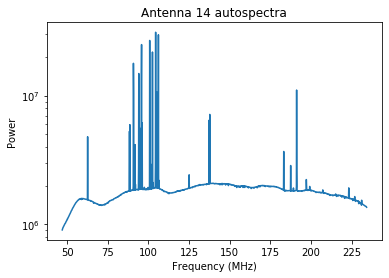

In [30]:
fig = plt.figure()
plt.plot(freq, np.abs(data))
plt.yscale('log')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power')
plt.title('Antenna 14 autospectra')

Text(0.5, 1.0, 'Antenna autospectra')

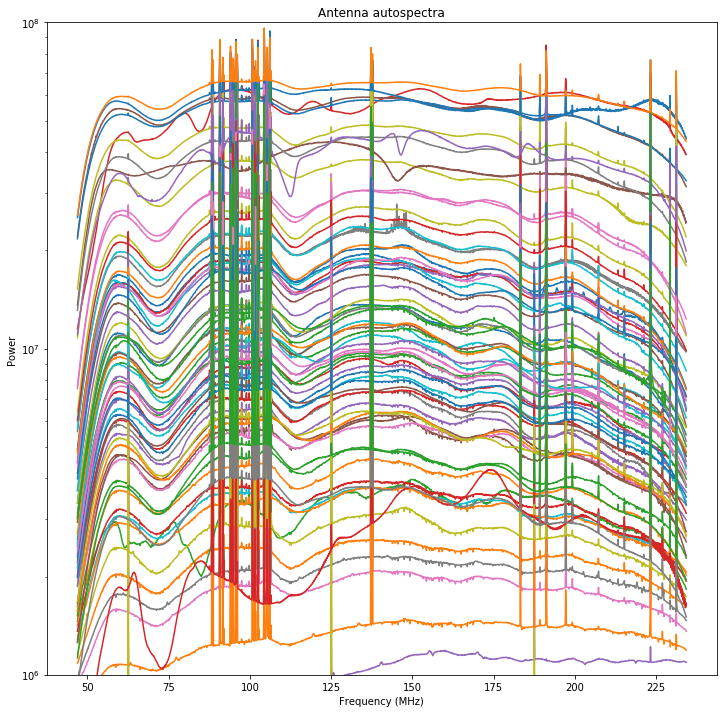

In [29]:
fig = plt.figure(figsize=(12,12))
for ant in antnums:
    dat = np.abs(uv.get_data((ant,ant,'xx'))[0])
    plt.plot(freq,dat)
plt.yscale('log')
plt.ylim((10e5,10e7))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power')
plt.title('Antenna autospectra')

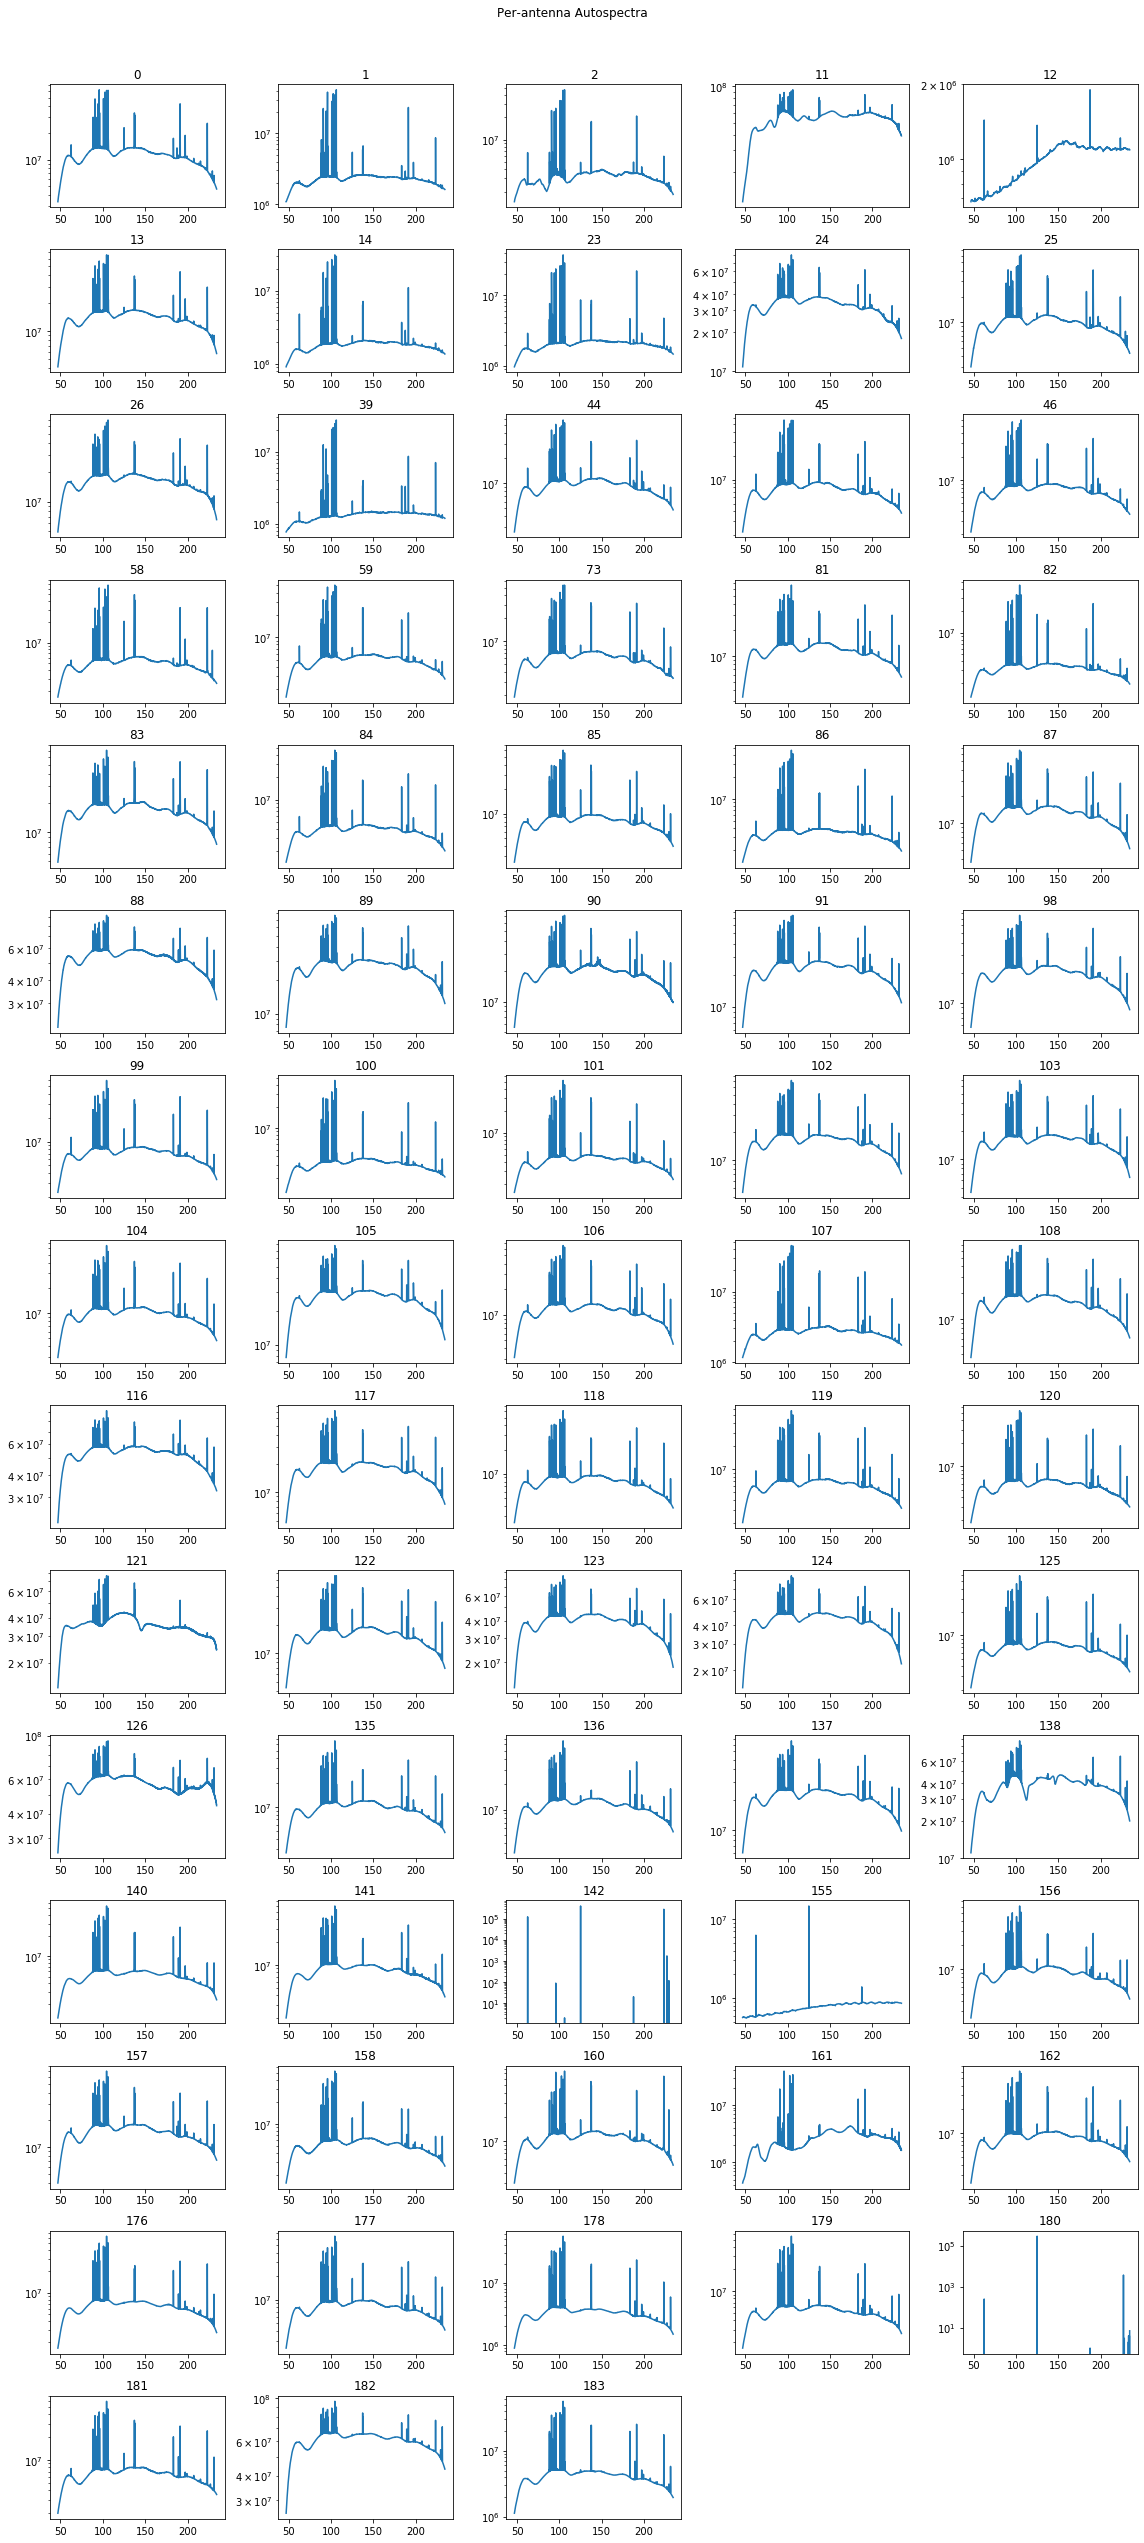

In [22]:
fig = plt.figure(figsize=(16,36))
nants = len(antnums)
Y = 5
X = nants//Y+1
for i,ant in enumerate(antnums):
    plt.subplot(X,Y,i+1)
    dat = np.abs(uv.get_data((antbananas,antbananas,'xx'))[0])
    plt.plot(freq,dat)
    plt.title(antbananas)
    plt.yscale('log')
plt.suptitle('Per-antenna Autospectra', y=0.98)
fig.tight_layout()
plt.subplots_adjust(top=0.95)